<a href="https://colab.research.google.com/github/shivam-kotwalia/data-science-project/blob/master/Face_Verification_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGGFace and VGGFace2 Models

The VGGFace refers to a series of models developed for face recognition and demonstrated on benchmark computer vision datasets by members of the Visual Geometry Group (VGG) at the University of Oxford.

There are two main VGG models for face recognition at the time of writing; they are VGGFace and VGGFace2. Let’s take a closer look at each in turn.

Inspired from - https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/

### keras-vggface - Model to classify image into celebs, use without top and get embedding also

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from PIL import Image
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install git+https://github.com/rcmalli/keras-vggface.git --quiet

In [3]:
! pip show keras-vggface

Name: keras-vggface
Version: 0.5
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, pyyaml, pillow, h5py, keras, six, scipy
Required-by: 


In [4]:
# check version of keras_vggface
import keras_vggface
# print version
print(keras_vggface.__version__)

Using TensorFlow backend.


0.5


###  Geting out Faces from Images 

In [6]:
! pip install mtcnn --quiet

     |████████████████████████████████| 2.3MB 9.7MB/s 


In [7]:
import mtcnn
from mtcnn.mtcnn import MTCNN
# print version
print(mtcnn.__version__)

0.0.9


In [8]:
# Celeb Images 
! wget -nv https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/celeb-hair-3-1549067654.jpg

2019-06-10 10:34:48 URL:https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/celeb-hair-3-1549067654.jpg [821488/821488] -> "celeb-hair-3-1549067654.jpg" [1]


In [134]:
celeb_image = plt.imread("celeb-hair-3-1549067654.jpg")
print(type(celeb_image))
#celeb_image = cv2.imread("celeb-hair-3-1549067654.jpg")[...,::-1]
# celeb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

<class 'numpy.ndarray'>


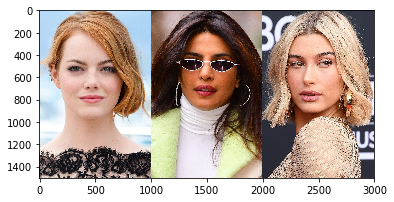

In [109]:
  plt.imshow(celeb_image)

In [110]:
celeb_image.shape

(1500, 3000, 3)

In [0]:
face_detecttor = MTCNN()
results = face_detecttor.detect_faces(celeb_image)

In [0]:
#??face_detecttor.detect_faces

In [0]:
#The result is a list of bounding boxes, where each bounding box defines a 
#lower-left-corner of the bounding box, as well as the width and height.

In [114]:
len(results)

5

In [115]:
for i in results:
  pprint(i)

{'box': [1256, 197, 502, 672],
 'confidence': 0.9999978542327881,
 'keypoints': {'left_eye': (1388, 470),
               'mouth_left': (1391, 708),
               'mouth_right': (1588, 722),
               'nose': (1487, 590),
               'right_eye': (1622, 483)}}
{'box': [144, 215, 608, 737],
 'confidence': 0.9999825954437256,
 'keypoints': {'left_eye': (337, 527),
               'mouth_left': (352, 785),
               'mouth_right': (588, 788),
               'nose': (475, 668),
               'right_eye': (608, 528)}}
{'box': [2190, 186, 531, 737],
 'confidence': 0.9973714351654053,
 'keypoints': {'left_eye': (2316, 479),
               'mouth_left': (2332, 761),
               'mouth_right': (2538, 755),
               'nose': (2410, 624),
               'right_eye': (2560, 468)}}
{'box': [89, 1315, 19, 21],
 'confidence': 0.8004677295684814,
 'keypoints': {'left_eye': (96, 1322),
               'mouth_left': (96, 1330),
               'mouth_right': (102, 1330),
             

In [116]:
cord = {}
for index, i in enumerate(results):
  if i.get("confidence") > 0.85:
    x1, y1, width, height = i.get("box")
    x2, y2 = x1 + width, y1 + height
    cord[index] = [x1, y1, x2, y2]
pprint(cord)

{0: [1256, 197, 1758, 869], 1: [144, 215, 752, 952], 2: [2190, 186, 2721, 923]}


In [117]:
cropped_images = []
for i in cord.values():
  x1, y1, x2, y2 = i
  print(x1, y1, x2, y2)
  cropped_images.append(celeb_image[y1:y2, x1:x2])

1256 197 1758 869
144 215 752 952
2190 186 2721 923


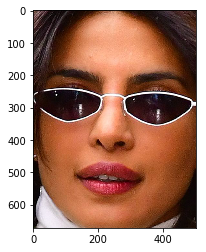

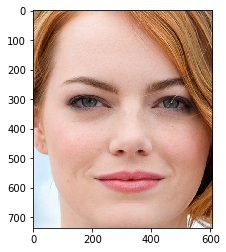

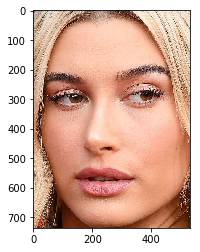

In [118]:
for i in cropped_images:
  plt.imshow(i)
  plt.show()

### vgg-faces with head model

In [119]:
print(keras_vggface.vggface.VGGFace.__doc__)

Instantiates the VGGFace architectures.
    Optionally loads weights pre-trained
    on VGGFace datasets. Note that when using TensorFlow,
    for best performance you should set
    `image_data_format="channels_last"` in your Keras config
    at ~/.keras/keras.json.
    The model and the weights are compatible with both
    TensorFlow and Theano. The data format
    convention used by the model is the one
    specified in your Keras config file.
    # Arguments
        include_top: whether to include the 3 fully-connected
            layers at the top of the network.
        weights: one of `None` (random initialization)
            or "vggface" (pre-training on VGGFACE datasets).
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        model: selects the one of the available architectures 
            vgg16, resnet50 or senet50 default is vgg16.
        input_shape: optional shape tuple, only to be specifie

In [0]:
vggface_with_head = keras_vggface.vggface.VGGFace(model="resnet50", include_top=True)

### Pre-process faces 

In [121]:
from keras_vggface.utils import preprocess_input
print(preprocess_input.__doc__)

None


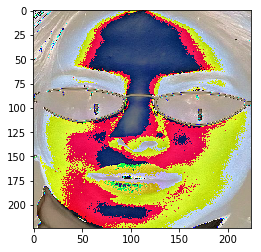

[[["b' Emily_Ratajkowski'", 0.16974373], ["b' Cameron_Russell'", 0.16495864], ["b' Chitrashi_Rawat'", 0.05509537], ["b' Sonali_Raut'", 0.045676623], ["b' Deeksha_Seth'", 0.039754465]]]


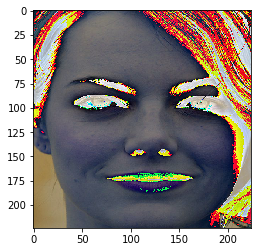

[[["b' Bijou_Phillips'", 0.39075956], ["b' Claudia_Gerini'", 0.06884796], ["b' Melissa_Sagemiller'", 0.03510235], ["b' Eva_Herman'", 0.033427116], ["b' Elyse_Taylor'", 0.026039021]]]


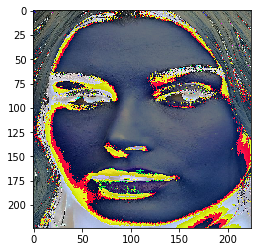

[[["b' Marija_Vujovi\\xc4\\x87'", 0.16346775], ["b' Lily_Aldridge'", 0.07910289], ["b' Ariadne_Artiles'", 0.0375955], ["b' Rozalia_Mancewicz'", 0.03643617], ["b' Beatrice_Borromeo'", 0.031381074]]]


In [164]:

processed_faces = []
for i in cropped_images:
  # Reshaping
  i = Image.fromarray(i)
  i = i.resize((224, 224))
  i = np.asarray(i)
  
  # Preprocess as per model
  i = i.astype("float32")
  i = preprocess_input(i, version=2)
  #print(i.shape)
  plt.imshow(Image.fromarray(i.astype('uint8')))
  plt.show()
  
  # Predicting
  i = np.expand_dims(i, axis=0)
  result = vggface_with_head.predict(i)
  print(keras_vggface.utils.decode_predictions(result))

# Compiling all things together 

In [176]:

  # Example of face detection with a vggface2 model
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    cropped_faces = []
    for i in results:
        x1, y1, width, height = i['box']
        x2, y2 = x1 + width, y1 + height
        # extract the face
        face = pixels[y1:y2, x1:x2]
        # resize pixels to the model size
        image = Image.fromarray(face)
        image = image.resize(required_size)
        face_array = asarray(image)
        cropped_faces.append(face_array)
    return cropped_faces


def tranformation(face_array):
    for pixels in face_array:
        # convert one face into samples
        pixels = pixels.astype('float32')
        samples = expand_dims(pixels, axis=0)
        # prepare the face for the model, e.g. center pixels
        samples = preprocess_input(samples, version=2)

        # create a vggface model
        model = VGGFace(model='resnet50')
        # perform prediction
        yhat = model.predict(samples)
        # convert prediction into names
        results = decode_predictions(yhat)
        # display most likely results
        for result in results[0]:
            print('%s: %.3f%%' % (result[0], result[1]*100))
        plt.imshow(Image.fromarray(samples.astype('float32')))
        
        
# load the photo and extract the face
#####################################################
# Enter your image here 
face_array = extract_face('celeb-hair-3-1549067654.jpg')
#####################################################

    
tranformation(face_array)

b' Emily_Ratajkowski': 16.974%
b' Cameron_Russell': 16.496%
b' Chitrashi_Rawat': 5.510%
b' Sonali_Raut': 4.568%
b' Deeksha_Seth': 3.975%


TypeError: ignored

In [180]:
plt.imshow(Image.fromarray(samples.astype('float32')))

TypeError: ignored

In [182]:
face_array[0].dtype

dtype('uint8')

TypeError: ignored

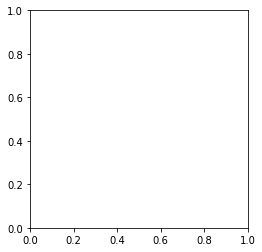

In [184]:
plt.imshow(samples.astype("uint8"))

In [187]:
samples[:,:,:,:].shape

(1, 224, 224, 3)